In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, col, when, min, max
from pyspark.sql.types import FloatType
from pyspark.sql.functions import skewness
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Bài 1.1: Tạo DataFrame từ dữ liệu điểm thi THPT Quốc gia 2020.
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv('dbfs:/FileStore/shared_uploads/danghia2002@gmail.com/diemthi2020.csv', header=True)


In [ ]:
df.show()

+---+----+----+----+----+----------------+---------+----+----+----+----+--------+
| TT| Dia|GDCD| Hoa|  Li|Ma_mon_ngoai_ngu|Ngoai_ngu|Sinh|  Su|Toan| Van|     sbd|
+---+----+----+----+----+----------------+---------+----+----+----+----+--------+
|  0| 7.0| 6.5|null|null|              N1|      4.2|null|4.75| 6.4|6.75|18014547|
|  1|7.75|7.75|null|null|              N1|      2.8|null|3.75| 7.6| 6.0|18014530|
|  2| 6.5|null|null|null|            null|     null|null| 4.0| 4.8|4.75|18014521|
|  3| 8.0| 9.5|null|null|              N1|      5.8|null|8.25| 8.0| 7.0|18014517|
|  4|null|null| 8.5| 8.0|              N1|      4.0| 5.0|null| 8.2| 6.5|18014523|
|  5|8.25|null|null|null|            null|     null|null|5.75| 5.4| 6.0|18014516|
|  6|5.75|7.75|null|null|              N1|      3.6|null|3.75| 7.4| 7.0|18014518|
|  7| 5.0|8.25|null|null|              N1|      2.8|null|3.75| 5.0|5.75|18014526|
|  8|5.75| 6.0|null|null|              N1|      4.0|null|3.75| 6.6| 6.0|18014524|
|  9|null|null|7

In [ ]:
# Bài 1.2: Thống kê sơ bộ về điểm thi các môn.
df.describe().show()

+-------+------------------+------------------+-----------------+------------------+------------------+----------------+------------------+------------------+------------------+------------------+-----------------+--------------------+
|summary|                TT|               Dia|             GDCD|               Hoa|                Li|Ma_mon_ngoai_ngu|         Ngoai_ngu|              Sinh|                Su|              Toan|              Van|                 sbd|
+-------+------------------+------------------+-----------------+------------------+------------------+----------------+------------------+------------------+------------------+------------------+-----------------+--------------------+
|  count|            870486|            555072|           482980|            295536|            293287|          772098|            772098|            290377|            568581|            866581|           856565|              870486|
|   mean|          435242.5| 6.773215456733541|8.1251640

In [ ]:
df.printSchema()

root
 |-- TT: string (nullable = true)
 |-- Dia: string (nullable = true)
 |-- GDCD: string (nullable = true)
 |-- Hoa: string (nullable = true)
 |-- Li: string (nullable = true)
 |-- Ma_mon_ngoai_ngu: string (nullable = true)
 |-- Ngoai_ngu: string (nullable = true)
 |-- Sinh: string (nullable = true)
 |-- Su: string (nullable = true)
 |-- Toan: string (nullable = true)
 |-- Van: string (nullable = true)
 |-- sbd: string (nullable = true)



In [ ]:
# Chuyển đổi kiểu dữ liệu của các cột điểm thi sang kiểu số
df = df.withColumn('Toan', df['Toan'].cast(FloatType()))
df = df.withColumn('Van', df['Van'].cast(FloatType()))
df = df.withColumn('Ngoai_ngu', df['Ngoai_ngu'].cast(FloatType()))

# Bài 1.3: Tính độ lệch, độ nhọn của phân bố điểm thi 3 môn: Toán, Văn, Ngoại ngữ.
toan_skewness = df.select(skewness('Toan')).collect()[0][0]
van_skewness = df.select(skewness('Van')).collect()[0][0]
ngoai_ngu_skewness = df.select(skewness('Ngoai_ngu')).collect()[0][0]

print(f"Độ lệch của điểm Toán: {toan_skewness}")
print(f"Độ lệch của điểm Văn: {van_skewness}")
print(f"Độ lệch của điểm Ngoại ngữ: {ngoai_ngu_skewness}")

Độ lệch của điểm Toán: -0.6491546594914888
Độ lệch của điểm Văn: -0.6372977449912144
Độ lệch của điểm Ngoại ngữ: 0.6859419742621411


In [ ]:
# Chuyển đổi kiểu dữ liệu của các cột điểm thi sang kiểu số
df = df.withColumn('Toan', df['Toan'].cast(FloatType()))
df = df.withColumn('Van', df['Van'].cast(FloatType()))
df = df.withColumn('Ngoai_ngu', df['Ngoai_ngu'].cast(FloatType()))


Toan,count
9.4,11227
9.0,27642
5.0,18685
7.6,41897
3.8,11755
7.8,42809
2.2,4613
3.4,10030
4.6,16009
7.4,40413


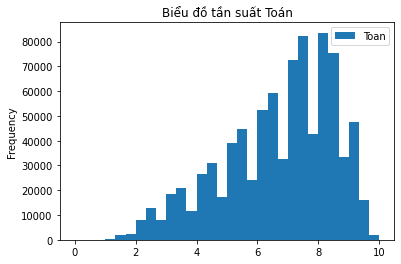

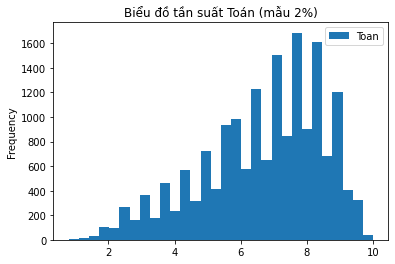

In [ ]:
# Bài 1.4: Vẽ biểu đồ tần suất của từng điểm thi.
# a) Gộp dữ liệu trên workers rồi thống kê từng nhóm ở Drive
df_grouped = df.groupBy('Toan').count()
display(df_grouped)

# b) Lấy toàn bộ dữ liệu về Drive để vẽ biểu đồ tần suất
df.select('Toan').toPandas().plot(kind='hist', bins=30, title='Biểu đồ tần suất Toán')
display()

# c) Lấy mẫu 2% theo điểm thi rồi thống kê và vẽ biểu đồ.
sample_df = df.sample(False, 0.02, seed=42)
sample_df.select('Toan').toPandas().plot(kind='hist', bins=30, title='Biểu đồ tần suất Toán (mẫu 2%)')
display()

In [ ]:
# Bài 1.5: Liệt kê SBD và điểm của những trường hợp outlier cho điểm thi từng môn
def find_outliers(column_name):
    q1, q3 = df.approxQuantile(column_name, [0.25, 0.75], 0.01)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df.filter((col(column_name) < lower_bound) | (col(column_name) > upper_bound))
    return outliers.select('SBD', column_name)

outliers_toan = find_outliers('Toan')
outliers_van = find_outliers('Van')
outliers_ngoai_ngu = find_outliers('Ngoai_ngu')

print("Outliers for Toan:")
outliers_toan.show()
print("Outliers for Van:")
outliers_van.show()
print("Outliers for Ngoai_ngu:")
outliers_ngoai_ngu.show()

Outliers for Toan:
+--------+----+
|     SBD|Toan|
+--------+----+
|18018035| 1.4|
|18018369| 1.4|
|18018797| 1.4|
|13003806| 1.4|
|13003869| 1.2|
|13004465| 0.6|
|13005549| 1.2|
|13005678| 1.2|
|13007102| 1.4|
|13007158| 1.2|
|13007248| 1.2|
|13007406| 1.4|
|44004930| 1.4|
|48009814| 1.2|
|48010053| 1.2|
|48010090| 1.2|
|48010349| 1.0|
|48010479| 1.0|
|48012050| 1.2|
|48012504| 1.4|
+--------+----+
only showing top 20 rows

Outliers for Van:
+--------+----+
|     SBD| Van|
+--------+----+
|18014540| 3.5|
|18014522| 3.5|
|18014602| 3.0|
|18014982| 3.5|
|18015034| 3.5|
|18015092|3.25|
|18015094| 3.5|
|18015095|3.25|
|18015082|3.25|
|18015121| 3.5|
|18015127|3.25|
|18015280| 3.0|
|18015359|3.25|
|18015426|3.25|
|18015550| 2.5|
|18015605| 1.5|
|18015608|2.75|
|18015633| 3.5|
|18015635|3.25|
|18015773| 3.5|
+--------+----+
only showing top 20 rows

Outliers for Ngoai_ngu:
+--------+---------+
|     SBD|Ngoai_ngu|
+--------+---------+
|18014964|      9.2|
|18015310|      9.2|
|18015388|    

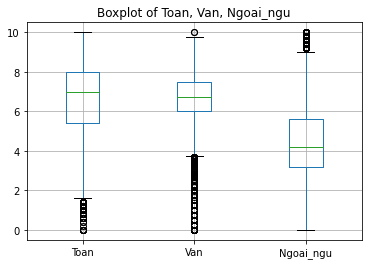

In [ ]:
# Bài 1.6: Vẽ biểu đồ hộp (Boxplot) cho điểm thi các môn.
df.select('Toan', 'Van', 'Ngoai_ngu').toPandas().boxplot()
plt.title('Boxplot of Toan, Van, Ngoai_ngu')
plt.show()

In [ ]:
# Bài 1.7: Tính độ tương quan điểm thi từng cặp môn.
correlation_toan_van = df.stat.corr('Toan', 'Van')
correlation_toan_ngoai_ngu = df.stat.corr('Toan', 'Ngoai_ngu')
correlation_van_ngoai_ngu = df.stat.corr('Van', 'Ngoai_ngu')

print(f"Độ tương quan giữa Toan và Van: {correlation_toan_van}")
print(f"Độ tương quan giữa Toan và Ngoai_ngu: {correlation_toan_ngoai_ngu}")
print(f"Độ tương quan giữa Van và Ngoai_ngu: {correlation_van_ngoai_ngu}")


Độ tương quan giữa Toan và Van: 0.36791129019868096
Độ tương quan giữa Toan và Ngoai_ngu: 0.5956413774444518
Độ tương quan giữa Van và Ngoai_ngu: 0.46404518335769596


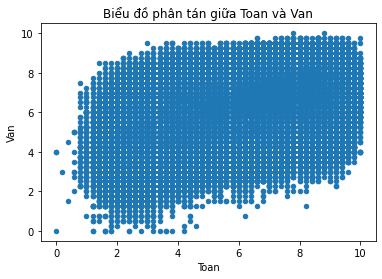

In [ ]:
# Bài 1.8: Vẽ biểu đồ phân tán thể hiện phân bố điểm tương quan giữa hai môn Toán và Văn.
df.select('Toan', 'Van').toPandas().plot.scatter(x='Toan', y='Van')
plt.title('Biểu đồ phân tán giữa Toan và Van')
plt.show()

In [ ]:
df = df.withColumn('Khoi_thi', 
                   when((col('Toan') > 0) & (col('Li') > 0) & (col('Hoa') > 0), 'A')
                   .when((col('Toan') > 0) & (col('Hoa') > 0) & (col('Sinh') > 0), 'B')
                   .when((col('Van') > 0) & (col('Su') > 0) & (col('Dia') > 0), 'C')
                   .when((col('Toan') > 0) & (col('Van') > 0) & (col('Ngoai_ngu') > 0), 'D')
                   .otherwise('Unknown'))


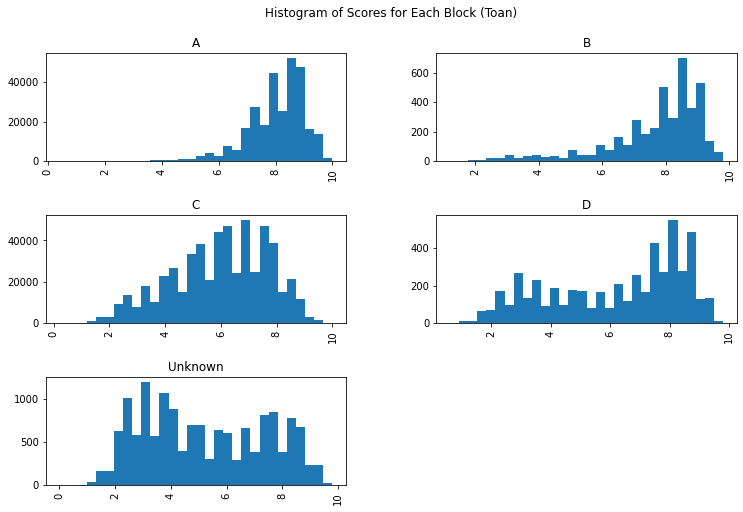

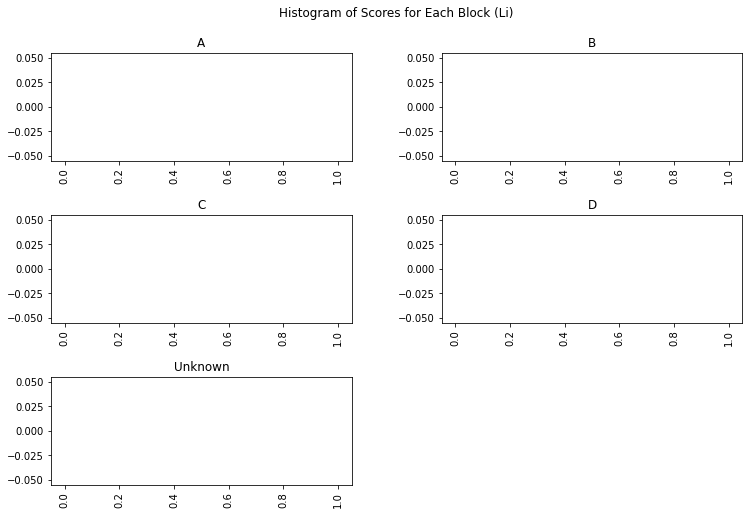

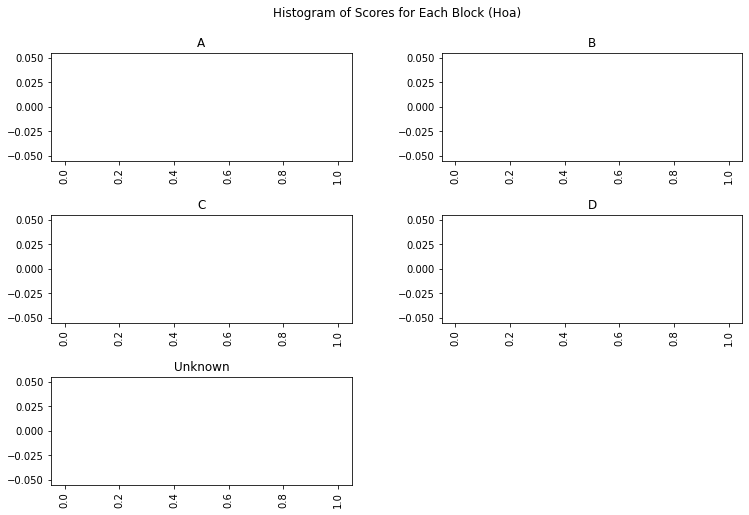

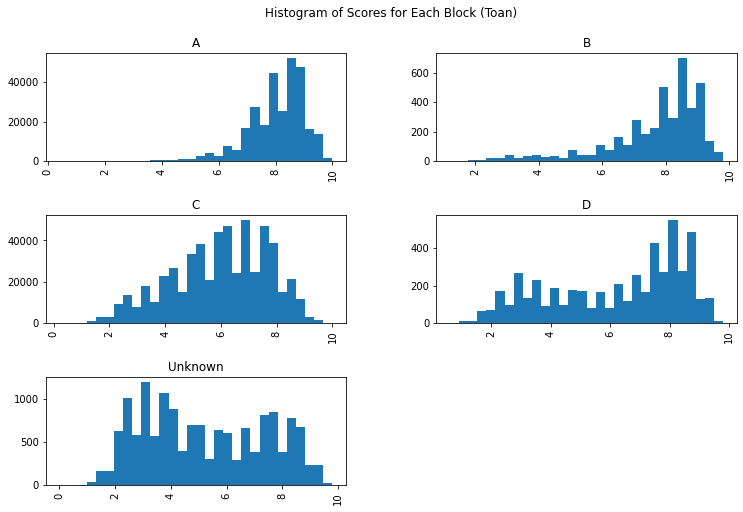

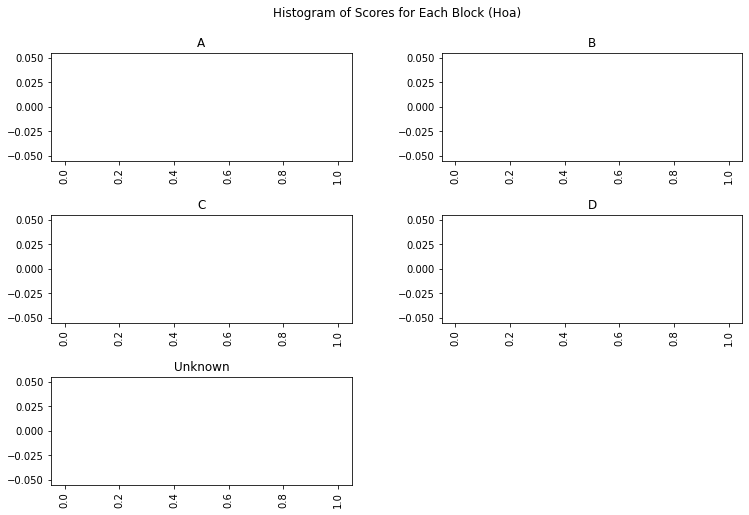

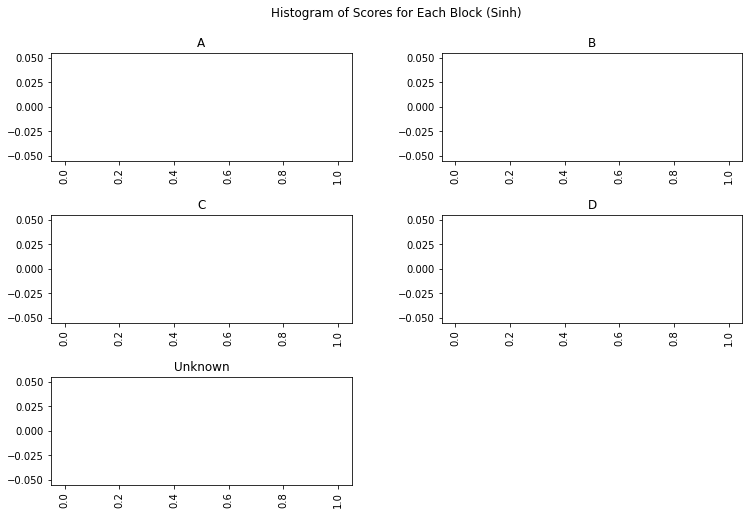

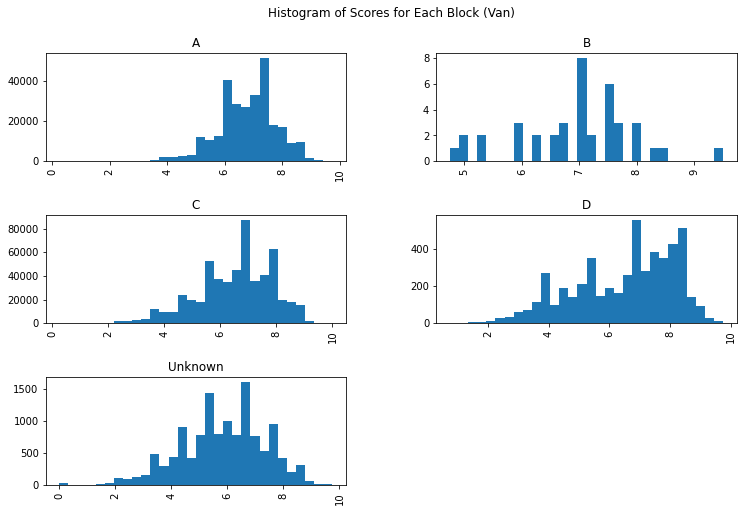

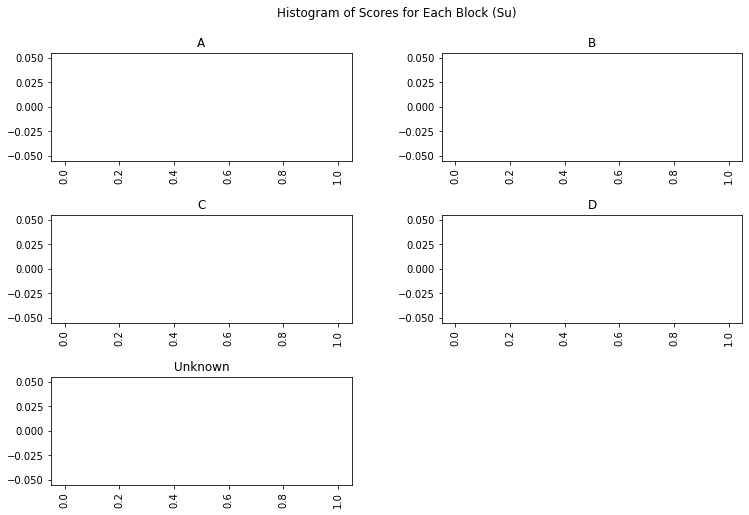

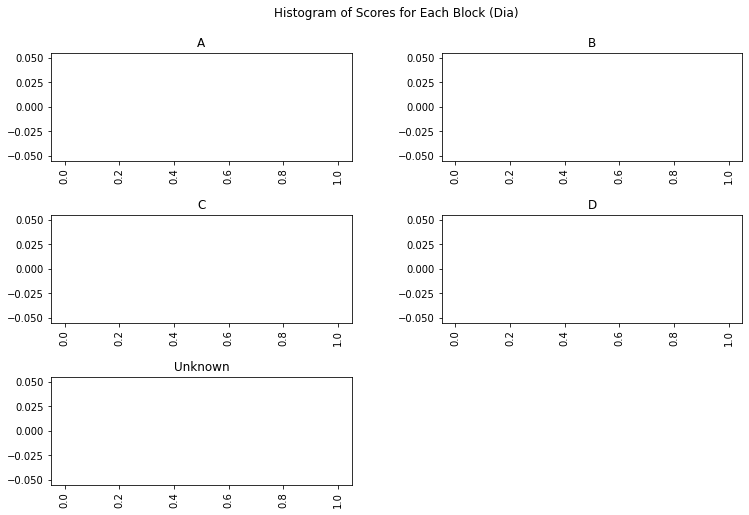

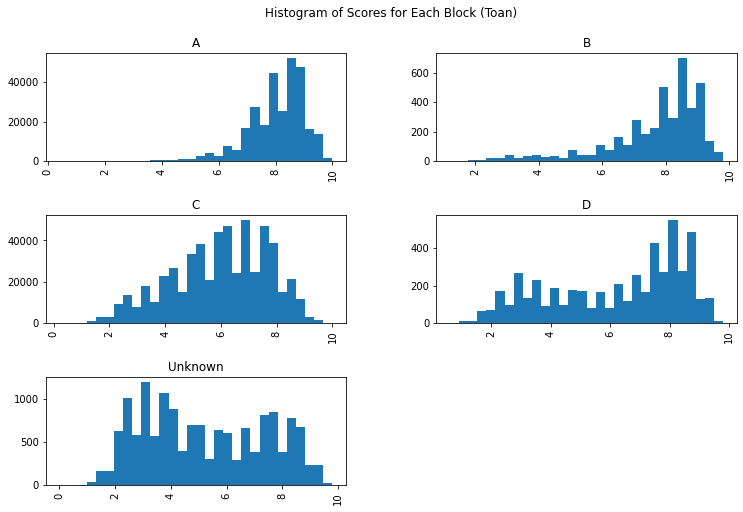

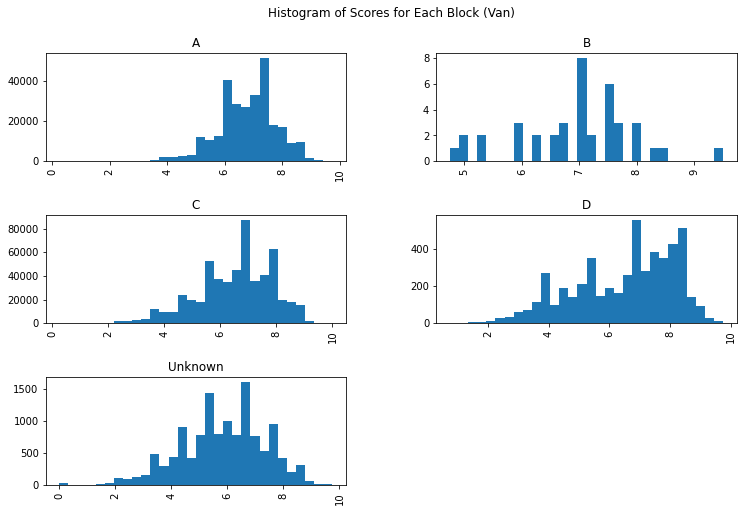

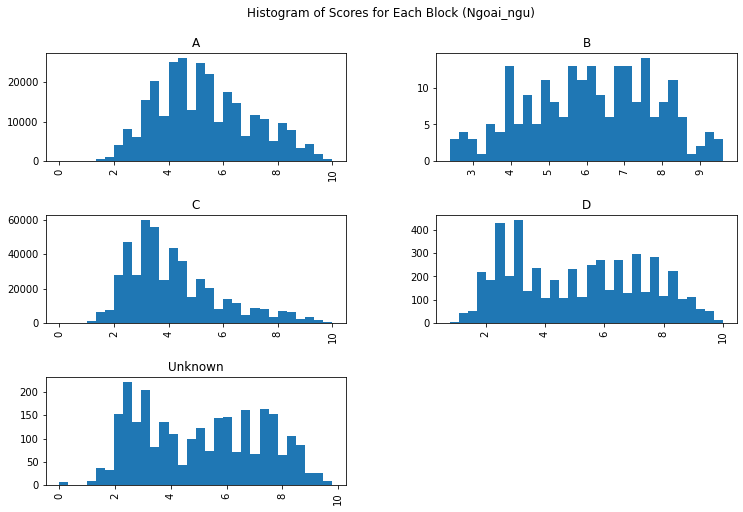

In [ ]:
# Bài 3.1: Vẽ biểu đồ tần suất phân bố điểm từng khối A, B, C, D với 30 mức điểm từ 0 đến 30.
subject_columns_A = ['Toan', 'Li', 'Hoa']
subject_columns_B = ['Toan', 'Hoa', 'Sinh']
subject_columns_C = ['Van', 'Su', 'Dia']
subject_columns_D = ['Toan', 'Van', 'Ngoai_ngu']

block_column = 'Khoi_thi'

# Vẽ biểu đồ tần suất cho từng khối
draw_histogram(df, subject_columns_A, block_column)
draw_histogram(df, subject_columns_B, block_column)
draw_histogram(df, subject_columns_C, block_column)
draw_histogram(df, subject_columns_D, block_column)